# VISUALIZACIÓN DE DATOS de GEOCULT-APP CLASIFICACIÓN CON NN
<p> En este script se realizarán las siguientes tareas:</p>
<p>En primer lugar, se leerán los datos de la base de datos local y se preprocesarán estos datos para visualizar gráficas que representen información sobre las actividades culturales en Madrid</p>
<p>En segundo lugar, se implementará un algoritmo de clasificación, utilizando una red neuronal, que clasifique las actividades culturales de Madrid (almacenadas en una base de datos local), en actividades de pago o gratuitas considerando los siguientes atributos: "Audicence", "time", "event-location", "latitude" y "longitude".<p>
<p>Script diseñado e implementado por: Carlos Breuer Carrasco y Emilio Delgado Muñoz.<p>

# FASE 0 - LECTURA DE DOCUMENTOS DE LA BASE DE DATOS LOCAL

<p>Conexión y lectura de los documentos almacenados en la base de datos local de MongoDB<p>

In [1]:
"1. Importación de las librerías necesarias para ejecutar el script"
import requests 
import numpy as np 
import re
import os
import tarfile
import urllib
import pandas as pd
from pymongo import MongoClient
from os import listdir # library from the system used to read files from a directory
from os import path # library used to check the veracity of files and folders
import time # library used to control time spent on training operations
import matplotlib.pyplot as plt # library used to plot graphs and figures
import seaborn as sb # library used to make heatmaps from confusion matrices
from matplotlib import image # library used to import an image as a vector
import math # library used for math operations
import tensorflow as tf # machine learning library
from tensorflow import keras as k
from tensorflow.keras.utils import to_categorical # function from keras to make the one_hot matrix from the labels
from tensorflow.keras import backend as K # backend from keras
from sklearn.model_selection import train_test_split # used for splitting the data set into train and test set
from pandas.plotting import scatter_matrix
import collections
import seaborn as sns # import seaborn library to plot confusion matrix with porcentage values
from sklearn.cluster import DBSCAN

In [2]:
"2. Definición de la función para realizar la conexión con la base de datos"
def get_db(CONNECTION_STRING):
    from pymongo import MongoClient
    import pymongo
    
    client = MongoClient(CONNECTION_STRING)
    return client  

In [3]:
"3. Establecimiento de la conexión con MongoDB y acceso a la base de datos 'local'"
#Del cliente se selecciona la base de datos que se desea, en este caso la local
CONNECTION_STRING = 'mongodb://localhost:27017/?readPreference=primary&appname=MongoDB%20Compass&directConnection=true&ssl=false'
db = get_db(CONNECTION_STRING)['local']
print(db)

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True, readpreference='primary', appname='MongoDB Compass', directconnection=True, tls=False), 'local')


In [4]:
"4. Acceso a la colección 'CultureEvents' de la base de datos 'local'. Se muestra información de la colección"
collection_name = db['CultureEvents']
print(collection_name)

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True, readpreference='primary', appname='MongoDB Compass', directconnection=True, tls=False), 'local'), 'CultureEvents')


In [5]:
"5. Función auxiliar para convertir una hora de una actividad cultural a un entero, respetando y manteniendo la escala original"
def time_to_numerical(time_str):
    if (time_str == '00:00'):
        return 1
    elif (time_str == '07:00'):
        return 29
    elif (time_str == '07:15'):
        return 30
    elif (time_str == '07:30'):
        return 31
    elif (time_str == '07:45'):
        return 32
    elif (time_str == '08:00'):
        return 33
    elif (time_str == '08:15'):
        return 34
    elif (time_str == '08:30'):
        return 35
    elif (time_str == '08:45'):
        return 36
    elif (time_str == '09:00'):
        return 37
    elif (time_str == '09:15'):
        return 38
    elif (time_str == '09:30'):
        return 39
    elif (time_str == '09:45'):
        return 40
    elif (time_str == '10:00'):
        return 41
    elif (time_str == '10:15'):
        return 42
    elif (time_str == '10:30'):
        return 43
    elif (time_str == '10:45'):
        return 44
    elif (time_str == '11:00'):
        return 45
    elif (time_str == '11:15'):
        return 46
    elif (time_str == '11:30'):
        return 47
    elif (time_str == '11:45'):
        return 48
    elif (time_str == '12:00'):
        return 49
    elif (time_str == '12:15'):
        return 50
    elif (time_str == '12:30'):
        return 51
    elif (time_str == '12:45'):
        return 52
    elif (time_str == '13:00'):
        return 53
    elif (time_str == '13:15'):
        return 54
    elif (time_str == '13:30'):
        return 55
    elif (time_str == '13:45'):
        return 56
    elif (time_str == '14:00'):
        return 57
    elif (time_str == '14:15'):
        return 58
    elif (time_str == '14:30'):
        return 59
    elif (time_str == '14:45'):
        return 60
    elif (time_str == '15:00'):
        return 61
    elif (time_str == '15:15'):
        return 62
    elif (time_str == '15:30'):
        return 63
    elif (time_str == '15:45'):
        return 64
    elif (time_str == '16:00'):
        return 65
    elif (time_str == '16:15'):
        return 66
    elif (time_str == '16:30'):
        return 67
    elif (time_str == '16:45'):
        return 68
    elif (time_str == '17:00'):
        return 69
    elif (time_str == '17:15'):
        return 70
    elif (time_str == '17:30'):
        return 71
    elif (time_str == '17:45'):
        return 72
    elif (time_str == '18:00'):
        return 73
    elif (time_str == '18:15'):
        return 74
    elif (time_str == '18:30'):
        return 75
    elif (time_str == '18:45'):
        return 76
    elif (time_str == '19:00'):
        return 77
    elif (time_str == '19:15'):
        return 78
    elif (time_str == '19:30'):
        return 79
    elif (time_str == '19:45'):
        return 80
    elif (time_str == '20:00'):
        return 81
    elif (time_str == '20:15'):
        return 82
    elif (time_str == '20:30'):
        return 83
    elif (time_str == '20:45'):
        return 84
    elif (time_str == '21:00'):
        return 85
    elif (time_str == '21:15'):
        return 86
    elif (time_str == '21:30'):
        return 87
    elif (time_str == '21:45'):
        return 88
    elif (time_str == '22:00'):
        return 89
    elif (time_str == '22:15'):
        return 90
    elif (time_str == '22:30'):
        return 91
    elif (time_str == '22:45'):
        return 92
    elif (time_str == '23:00'):
        return 93
    else:
        return 0

In [6]:
"6. Lectura de los datos de la colección de la base de datos a un dataframe de la librería pandas"
def read_mongo(db, collection, query={}):
    """ Read from Mongo and Store into DataFrame """

    # Make a query to the specific DB and Collection
    cursor = db[collection].find(query)
    
    # Define the dataframe
    df = pd.DataFrame(columns=("id","title","free","price", "dtstart", "dtend", "time", "time_code", "audience", "event-location", "latitude", "longitude"))

    # Expand the cursor and construct the DataFrame
    contador = 0
    list_words_prices = ['euros', 'Gratuito', 'gratuita', 'Gratis', 'libre', '']
    list_hours_time = ['19:01', '18:40']
    for doc in cursor:
        contador = contador + 1
        if(any(word in doc['price'] for word in list_words_prices) and doc['time'] not in list_hours_time):
            if ('euros' in doc['price']):
                price_list = [int(s) for s in re.findall(r'\b\d+\b', doc['price'])]
                precio = price_list[0]
            else:
                precio = 0
            if doc['time'] == '':
                hora_doc = "Sin especificar"
            else:
                hora_doc = doc['time']
            numerical_time = time_to_numerical(doc['time'])
            df = df.append({'id' : doc['id'],'title':doc['title'], 'free' : float(doc['free']), 'price' : float(precio),
                            'dtstart':doc['dtstart'], 'dtend':doc['dtend'], 'time':hora_doc, 'time_code':float(numerical_time),
                            'audience': doc['audience'], 'event-location' : doc['event-location'],
                            'latitude' : doc['location']['latitude'], 'longitude' : doc['location']['longitude']},
                           ignore_index=True, verify_integrity=False, sort=None) 
    
    df.drop_duplicates()
    #df = df.drop(df[(df.price > 50.0)].index)
    print("Documentos devueltos: ", df.shape[0])
    return df

In [7]:
geoCult_data = None
geoCult_data = read_mongo(db, 'CultureEvents', query={})
geoCult_data.head()

Documentos devueltos:  2306


,id,title,free,price,dtstart,dtend,time,time_code,audience,event-location,latitude,longitude
0,11630153,3 a 5 años. 'Lost and found' &amp; 'My pet',1.0,0.0,2022-04-18 18:00:00.0,2022-04-18 23:59:00.0,18:00,73.0,"Niños,Familias",Biblioteca Pública Municipal Miguel Delibes (M...,40.409717,-3.652982
1,11630154,3 a 5 años. 'Lost and found' &amp; 'My pet',1.0,0.0,2022-04-23 12:00:00.0,2022-04-23 23:59:00.0,12:00,49.0,"Niños,Familias",Biblioteca Pública Municipal de San Fermín (Us...,40.371162,-3.692743
2,11630144,3 a 5 años. 'The hungry caterpillar' &amp; 'Th...,1.0,0.0,2022-04-07 18:00:00.0,2022-04-07 23:59:00.0,18:00,73.0,"Niños,Familias",Biblioteca Pública Municipal José Saramago (Fu...,40.478601,-3.709441
3,11630143,3 a 5 años. 'The hungry caterpillar' &amp; 'Th...,1.0,0.0,2022-04-20 18:00:00.0,2022-04-20 23:59:00.0,18:00,73.0,"Niños,Familias",Biblioteca Pública Municipal Dámaso Alonso (Ch...,40.467453,-3.684611
4,11617935,57 premio Reina Sofía de pintura y escultura.,1.0,0.0,2022-03-03 00:00:00.0,2022-04-03 23:59:00.0,Sin especificar,0.0,No audience,Centro Cultural Casa de Vacas (Retiro),40.419060,-3.684062


In [8]:
geoCult_data["audience"].value_counts()

No audience                           1653
Niños                                  368
Niños,Familias                         117
Jovenes                                 54
Mujeres                                 42
Familias,Mayores                        23
Familias                                19
Mujeres,Familias                         9
Jovenes,Familias,Mayores                 7
Mayores                                  4
Mujeres,Mayores                          2
Jovenes,Mayores                          1
Jovenes,EstudianteseInvestigadores       1
Mujeres,InmigrantesyEmigrantes           1
Jovenes,Niños,Familias,Mayores           1
Jovenes,Mujeres,Familias                 1
Jovenes,Niños,Mayores                    1
Jovenes,Niños,Familias                   1
Jovenes,Niños                            1
Name: audience, dtype: int64

In [9]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
geoCult_data["audience_code"] = ord_enc.fit_transform(geoCult_data[["audience"]])
geoCult_data["audience_code"] = geoCult_data["audience_code"].astype('float64')
geoCult_data[["audience", "audience_code"]].head(11)

,audience,audience_code
0,"Niños,Familias",17.0
1,"Niños,Familias",17.0
2,"Niños,Familias",17.0
3,"Niños,Familias",17.0
4,No audience,18.0
5,"Niños,Familias",17.0
6,"Niños,Familias",17.0
7,"Niños,Familias",17.0
8,"Niños,Familias",17.0
9,"Niños,Familias",17.0


In [10]:
geoCult_data["audience_code"].value_counts()

18.0    1653
16.0     368
17.0     117
2.0       54
12.0      42
1.0       23
0.0       19
13.0       9
4.0        7
11.0       4
15.0       2
5.0        1
6.0        1
9.0        1
10.0       1
3.0        1
8.0        1
7.0        1
14.0       1
Name: audience_code, dtype: int64

In [11]:
geoCult_data["event-location"].value_counts()

Cineteca Madrid                                                                     71
Centro de Cultura Contemporánea Conde Duque                                         65
Espacio Abierto Quinta de los Molinos                                               60
Matadero Madrid                                                                     55
Biblioteca Pública Municipal Eugenio Trías. Casa de Fieras de El Retiro (Retiro)    50
                                                                                    ..
Centro Cultural Mercado de Ibiza (Retiro)                                            1
Espacio de Igualdad Hermanas Mirabal. Tetuán                                         1
FUNDACIÓN AMYC                                                                       1
Club de Campo Villa de Madrid                                                        1
Museo Lázaro Galdiano                                                                1
Name: event-location, Length: 206, dtype: i

In [12]:
geoCult_data["event-location_code"] = ord_enc.fit_transform(geoCult_data[["event-location"]])
geoCult_data["event-location_code"] = geoCult_data["event-location_code"].astype('float64')
geoCult_data[["event-location", "event-location_code"]].head(11)

,event-location,event-location_code
0,Biblioteca Pública Municipal Miguel Delibes (M...,35.0
1,Biblioteca Pública Municipal de San Fermín (Us...,43.0
2,Biblioteca Pública Municipal José Saramago (Fu...,28.0
3,Biblioteca Pública Municipal Dámaso Alonso (Ch...,18.0
4,Centro Cultural Casa de Vacas (Retiro),52.0
5,Biblioteca Pública Municipal San Blas (San Bla...,40.0
6,Biblioteca Pública Municipal Ciudad Lineal (Ci...,16.0
7,Biblioteca Pública Municipal Pozo del Tío Raim...,38.0
8,Biblioteca Pública Municipal La Elipa (Ciudad ...,30.0
9,Biblioteca Pública Municipal María Lejárraga (...,33.0


In [13]:
geoCult_data["event-location_code"].value_counts()

137.0    71
133.0    65
144.0    60
174.0    55
19.0     50
         ..
138.0     1
6.0       1
176.0     1
123.0     1
141.0     1
Name: event-location_code, Length: 206, dtype: int64

In [14]:
geoCult_data["price"].value_counts()

0.0      2188
18.0       19
20.0       14
3.0        13
10.0       12
6.0        11
4.0         9
5.0         9
8.0         6
30.0        5
7.0         3
40.0        2
16.0        2
24.0        2
12.0        2
38.0        2
140.0       1
22.0        1
9.0         1
150.0       1
1.0         1
205.0       1
28.0        1
Name: price, dtype: int64

In [15]:
geoCult_data["free"].value_counts()

1.0    1883
0.0     423
Name: free, dtype: int64

In [16]:
geoCult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2306 entries, 0 to 2305
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   2306 non-null   object 
 1   title                2306 non-null   object 
 2   free                 2306 non-null   float64
 3   price                2306 non-null   float64
 4   dtstart              2306 non-null   object 
 5   dtend                2306 non-null   object 
 6   time                 2306 non-null   object 
 7   time_code            2306 non-null   float64
 8   audience             2306 non-null   object 
 9   event-location       2306 non-null   object 
 10  latitude             2306 non-null   float64
 11  longitude            2306 non-null   float64
 12  audience_code        2306 non-null   float64
 13  event-location_code  2306 non-null   float64
dtypes: float64(7), object(7)
memory usage: 252.3+ KB


In [17]:
geoCult_data.head(10)

,id,title,free,price,dtstart,dtend,time,time_code,audience,event-location,latitude,longitude,audience_code,event-location_code
0,11630153,3 a 5 años. 'Lost and found' &amp; 'My pet',1.0,0.0,2022-04-18 18:00:00.0,2022-04-18 23:59:00.0,18:00,73.0,"Niños,Familias",Biblioteca Pública Municipal Miguel Delibes (M...,40.409717,-3.652982,17.0,35.0
1,11630154,3 a 5 años. 'Lost and found' &amp; 'My pet',1.0,0.0,2022-04-23 12:00:00.0,2022-04-23 23:59:00.0,12:00,49.0,"Niños,Familias",Biblioteca Pública Municipal de San Fermín (Us...,40.371162,-3.692743,17.0,43.0
2,11630144,3 a 5 años. 'The hungry caterpillar' &amp; 'Th...,1.0,0.0,2022-04-07 18:00:00.0,2022-04-07 23:59:00.0,18:00,73.0,"Niños,Familias",Biblioteca Pública Municipal José Saramago (Fu...,40.478601,-3.709441,17.0,28.0
3,11630143,3 a 5 años. 'The hungry caterpillar' &amp; 'Th...,1.0,0.0,2022-04-20 18:00:00.0,2022-04-20 23:59:00.0,18:00,73.0,"Niños,Familias",Biblioteca Pública Municipal Dámaso Alonso (Ch...,40.467453,-3.684611,17.0,18.0
4,11617935,57 premio Reina Sofía de pintura y escultura.,1.0,0.0,2022-03-03 00:00:00.0,2022-04-03 23:59:00.0,Sin especificar,0.0,No audience,Centro Cultural Casa de Vacas (Retiro),40.419060,-3.684062,18.0,52.0
5,11630142,6 a 9 años. 'The cat in the hat' &amp; 'Sown f...,1.0,0.0,2022-04-25 18:00:00.0,2022-04-25 23:59:00.0,18:00,73.0,"Niños,Familias",Biblioteca Pública Municipal San Blas (San Bla...,40.420232,-3.621811,17.0,40.0
6,11630140,6 a 9 años. 'The cat in the hat' &amp; 'Sown f...,1.0,0.0,2022-04-08 18:00:00.0,2022-04-08 23:59:00.0,18:00,73.0,"Niños,Familias",Biblioteca Pública Municipal Ciudad Lineal (Ci...,40.436447,-3.637292,17.0,16.0
7,11630141,6 a 9 años. 'The cat in the hat' &amp; 'Sown f...,1.0,0.0,2022-04-06 18:00:00.0,2022-04-06 23:59:00.0,18:00,73.0,"Niños,Familias",Biblioteca Pública Municipal Pozo del Tío Raim...,40.373586,-3.660255,17.0,38.0
8,11630150,6 a 9 años. 'The enormous turnip' &amp; 'Tell ...,1.0,0.0,2022-04-05 18:00:00.0,2022-04-05 23:59:00.0,18:00,73.0,"Niños,Familias",Biblioteca Pública Municipal La Elipa (Ciudad ...,40.423427,-3.651842,17.0,30.0
9,11630151,6 a 9 años. 'The enormous turnip' &amp; 'Tell ...,1.0,0.0,2022-04-09 12:00:00.0,2022-04-09 23:59:00.0,12:00,49.0,"Niños,Familias",Biblioteca Pública Municipal María Lejárraga (...,40.490416,-3.655357,17.0,33.0


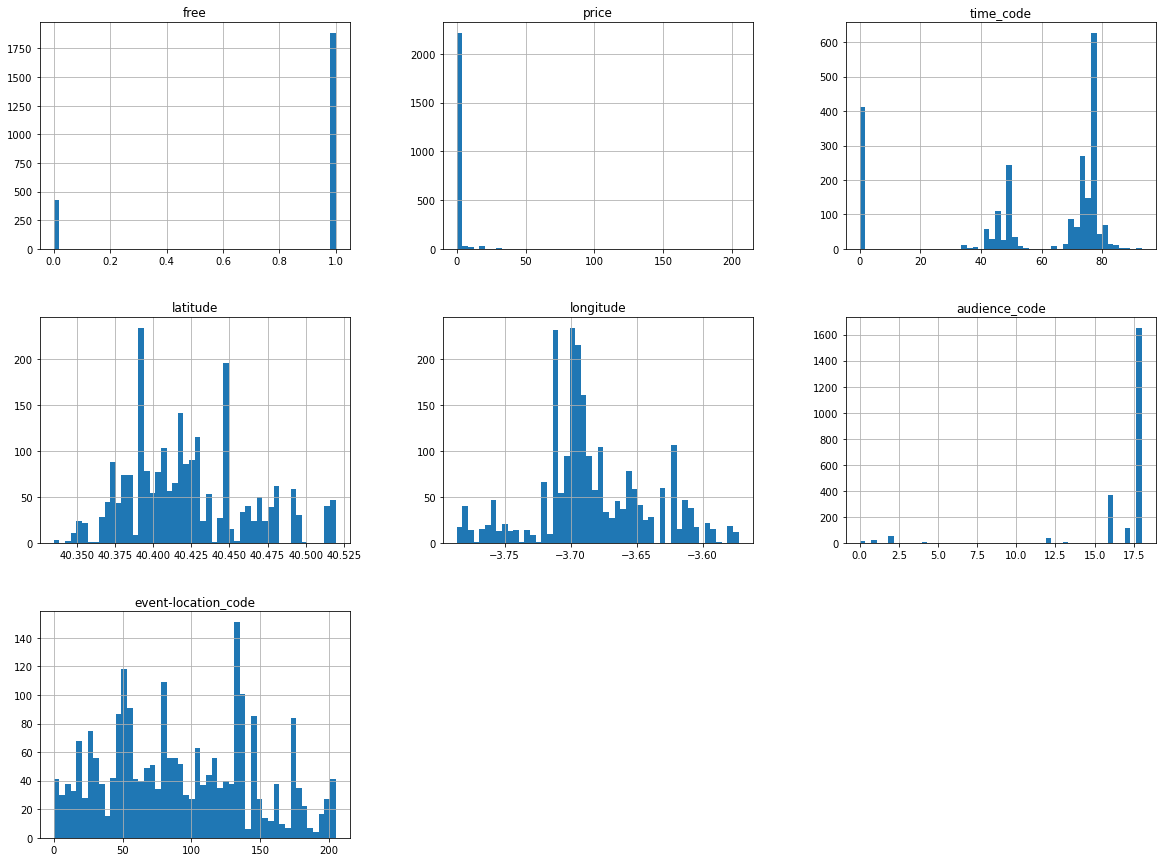

In [18]:
geoCult_data.hist(bins=50, figsize=(20,15))
plt.show()

array([[<AxesSubplot:xlabel='latitude', ylabel='latitude'>,
        <AxesSubplot:xlabel='longitude', ylabel='latitude'>,
        <AxesSubplot:xlabel='price', ylabel='latitude'>,
        <AxesSubplot:xlabel='event-location_code', ylabel='latitude'>,
        <AxesSubplot:xlabel='free', ylabel='latitude'>,
        <AxesSubplot:xlabel='time_code', ylabel='latitude'>,
        <AxesSubplot:xlabel='audience_code', ylabel='latitude'>],
       [<AxesSubplot:xlabel='latitude', ylabel='longitude'>,
        <AxesSubplot:xlabel='longitude', ylabel='longitude'>,
        <AxesSubplot:xlabel='price', ylabel='longitude'>,
        <AxesSubplot:xlabel='event-location_code', ylabel='longitude'>,
        <AxesSubplot:xlabel='free', ylabel='longitude'>,
        <AxesSubplot:xlabel='time_code', ylabel='longitude'>,
        <AxesSubplot:xlabel='audience_code', ylabel='longitude'>],
       [<AxesSubplot:xlabel='latitude', ylabel='price'>,
        <AxesSubplot:xlabel='longitude', ylabel='price'>,
        <AxesS

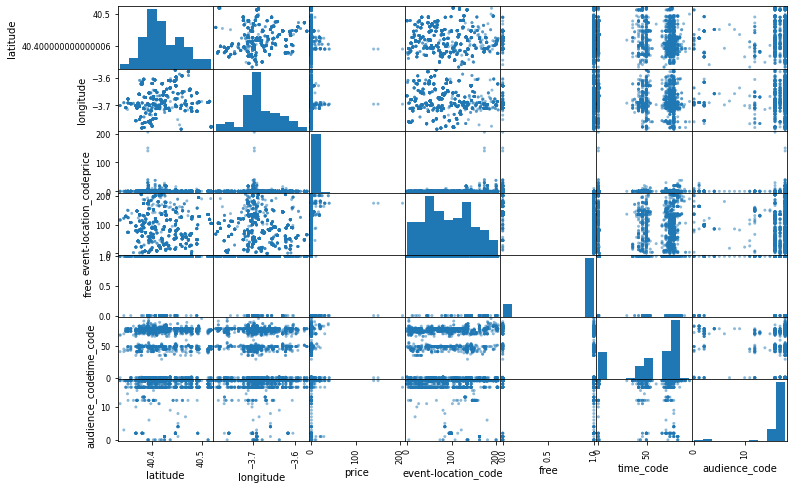

In [53]:
attributes = ["latitude", "longitude", "price", "event-location_code", "free", "time_code", "audience_code"]
scatter_matrix(geoCult_data[attributes], figsize=(12, 8))

In [19]:
geoCult_data.describe()

,free,price,time_code,latitude,longitude,audience_code,event-location_code
count,2306.000000,2306.000000,2306.000000,2306.000000,2306.000000,2306.000000,2306.000000
mean,0.816565,0.850824,55.339983,40.421975,-3.684186,16.715958,92.547268
std,0.387106,6.930541,28.499583,0.039029,0.042352,3.525978,52.799590
min,0.000000,0.000000,0.000000,40.334752,-3.786130,0.000000,0.000000
25%,1.000000,0.000000,45.000000,40.392414,-3.708524,17.000000,51.000000
50%,1.000000,0.000000,73.000000,40.418784,-3.692206,18.000000,87.500000
75%,1.000000,0.000000,77.000000,40.447740,-3.655607,18.000000,135.000000
max,1.000000,205.000000,93.000000,40.519673,-3.572741,18.000000,205.000000


In [20]:
train_set, test_set = train_test_split(geoCult_data, test_size=0.2, random_state=42)

print("train = ", len(train_set), "test = ", len(test_set))

train =  1844 test =  462


In [21]:
"Se eliminan las columnas innecesarias que no se utilizarán para entrenar la red neuronal"
geoCult_data.pop('id')
geoCult_data.pop('title')
geoCult_data.pop('dtstart')
geoCult_data.pop('dtend')
geoCult_data.pop('event-location')
geoCult_data.pop('audience')
geoCult_data.pop('time')
geoCult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2306 entries, 0 to 2305
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   free                 2306 non-null   float64
 1   price                2306 non-null   float64
 2   time_code            2306 non-null   float64
 3   latitude             2306 non-null   float64
 4   longitude            2306 non-null   float64
 5   audience_code        2306 non-null   float64
 6   event-location_code  2306 non-null   float64
dtypes: float64(7)
memory usage: 126.2 KB


In [22]:
geoCult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2306 entries, 0 to 2305
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   free                 2306 non-null   float64
 1   price                2306 non-null   float64
 2   time_code            2306 non-null   float64
 3   latitude             2306 non-null   float64
 4   longitude            2306 non-null   float64
 5   audience_code        2306 non-null   float64
 6   event-location_code  2306 non-null   float64
dtypes: float64(7)
memory usage: 126.2 KB


# ALGORITMO DBScan

In [71]:
clustering = DBSCAN(eps=0.003, min_samples=2).fit(geoCult_data)
clustering.labels_

clustering

DBSCAN(eps=0.003, min_samples=2)

In [72]:
print(clustering.labels_)
print(collections.Counter(clustering.labels_))

[ -1   0  -1 ...  -1 264  -1]
Counter({-1: 527, 59: 46, 22: 30, 60: 30, 96: 27, 2: 24, 49: 24, 29: 23, 163: 19, 10: 17, 36: 17, 13: 16, 270: 16, 78: 15, 31: 14, 68: 14, 40: 13, 41: 12, 19: 11, 56: 11, 66: 11, 20: 10, 39: 10, 125: 10, 12: 9, 50: 9, 71: 9, 119: 9, 133: 9, 169: 9, 228: 9, 277: 9, 23: 8, 57: 8, 85: 8, 135: 8, 166: 8, 168: 8, 177: 8, 192: 8, 209: 8, 268: 8, 269: 8, 273: 8, 283: 8, 313: 8, 24: 7, 73: 7, 90: 7, 95: 7, 205: 7, 208: 7, 227: 7, 261: 7, 271: 7, 316: 7, 328: 7, 333: 7, 374: 7, 14: 6, 38: 6, 43: 6, 46: 6, 63: 6, 91: 6, 94: 6, 99: 6, 112: 6, 132: 6, 145: 6, 180: 6, 195: 6, 199: 6, 225: 6, 231: 6, 241: 6, 247: 6, 254: 6, 260: 6, 306: 6, 323: 6, 325: 6, 331: 6, 334: 6, 371: 6, 372: 6, 384: 6, 8: 5, 44: 5, 75: 5, 87: 5, 100: 5, 116: 5, 127: 5, 128: 5, 150: 5, 161: 5, 170: 5, 178: 5, 188: 5, 191: 5, 197: 5, 201: 5, 219: 5, 221: 5, 223: 5, 230: 5, 258: 5, 276: 5, 298: 5, 315: 5, 366: 5, 387: 5, 6: 4, 7: 4, 9: 4, 21: 4, 26: 4, 28: 4, 34: 4, 48: 4, 51: 4, 58: 4, 67: 4, 80:

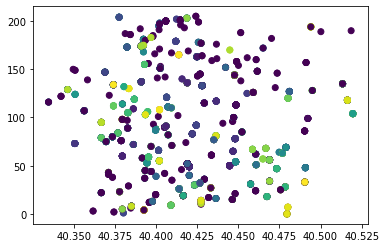

In [73]:
plt.scatter(geoCult_data['latitude'], geoCult_data['event-location_code'], c=clustering.labels_)

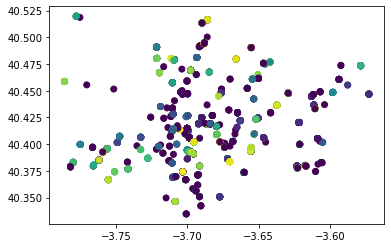

In [74]:
plt.scatter(geoCult_data['longitude'], geoCult_data['latitude'], c=clustering.labels_)

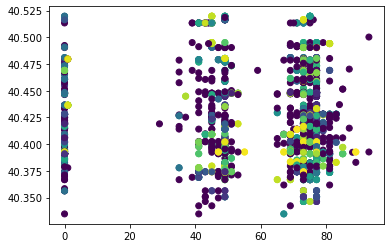

In [75]:
plt.scatter(geoCult_data['time_code'], geoCult_data['latitude'], c=clustering.labels_)

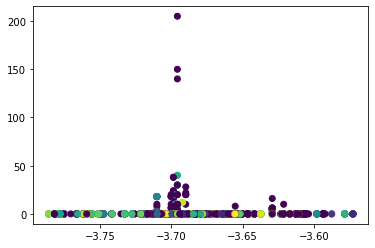

In [76]:
plt.scatter(geoCult_data['longitude'], geoCult_data['price'], c=clustering.labels_)

In [77]:
geoCult_data['labels'] = clustering.labels_

In [78]:
geoCult_data

,free,price,time_code,latitude,longitude,audience_code,event-location_code,labels
0,1.0,0.0,73.0,40.409717,-3.652982,17.0,35.0,-1
1,1.0,0.0,49.0,40.371162,-3.692743,17.0,43.0,0
2,1.0,0.0,73.0,40.478601,-3.709441,17.0,28.0,-1
3,1.0,0.0,73.0,40.467453,-3.684611,17.0,18.0,-1
4,1.0,0.0,0.0,40.419060,-3.684062,18.0,52.0,1
...,...,...,...,...,...,...,...,...
2301,1.0,0.0,77.0,40.356397,-3.694050,18.0,107.0,100
2302,1.0,0.0,47.0,40.356397,-3.694050,18.0,107.0,-1
2303,1.0,0.0,73.0,40.475717,-3.646673,18.0,25.0,-1
2304,1.0,0.0,73.0,40.467453,-3.684611,18.0,18.0,264


In [79]:
geoCult_data_no_outliers = geoCult_data[(geoCult_data['labels'] != -1)]

In [80]:
geoCult_data_no_outliers

,free,price,time_code,latitude,longitude,audience_code,event-location_code,labels
1,1.0,0.0,49.0,40.371162,-3.692743,17.0,43.0,0
4,1.0,0.0,0.0,40.419060,-3.684062,18.0,52.0,1
12,1.0,0.0,77.0,40.419060,-3.684062,18.0,52.0,2
13,1.0,0.0,75.0,40.379585,-3.623110,16.0,60.0,3
15,1.0,0.0,0.0,40.447200,-3.699877,2.0,100.0,4
...,...,...,...,...,...,...,...,...
2297,1.0,0.0,49.0,40.419060,-3.684062,18.0,52.0,123
2298,1.0,0.0,49.0,40.356397,-3.694050,18.0,107.0,55
2299,1.0,0.0,49.0,40.414103,-3.709859,18.0,26.0,125
2301,1.0,0.0,77.0,40.356397,-3.694050,18.0,107.0,100


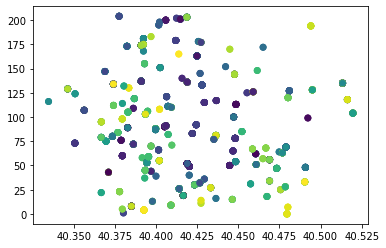

In [81]:
plt.scatter(geoCult_data_no_outliers['latitude'], geoCult_data_no_outliers['event-location_code'], c=geoCult_data_no_outliers['labels'])

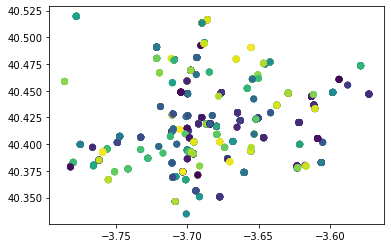

In [82]:
plt.scatter(geoCult_data_no_outliers['longitude'], geoCult_data_no_outliers['latitude'], c=geoCult_data_no_outliers['labels'])

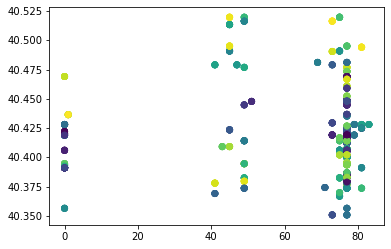

In [51]:
plt.scatter(geoCult_data_no_outliers['time_code'], geoCult_data_no_outliers['latitude'], c=geoCult_data_no_outliers['labels'])

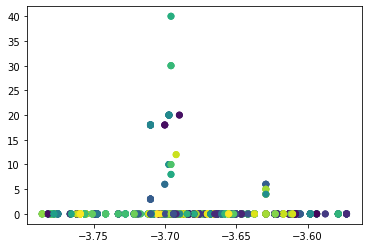

In [83]:
plt.scatter(geoCult_data_no_outliers['longitude'], geoCult_data_no_outliers['price'], c=geoCult_data_no_outliers['labels'])